In [5]:
import pandas as pd
data=pd.read_csv("weather_forecast.csv")
data.head()

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [6]:
data.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

In [7]:
data.dtypes

Outlook        object
Temperature    object
Humidity       object
Windy          object
Play           object
dtype: object

Accuracy: 0.33
Classification Report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         1
         Yes       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



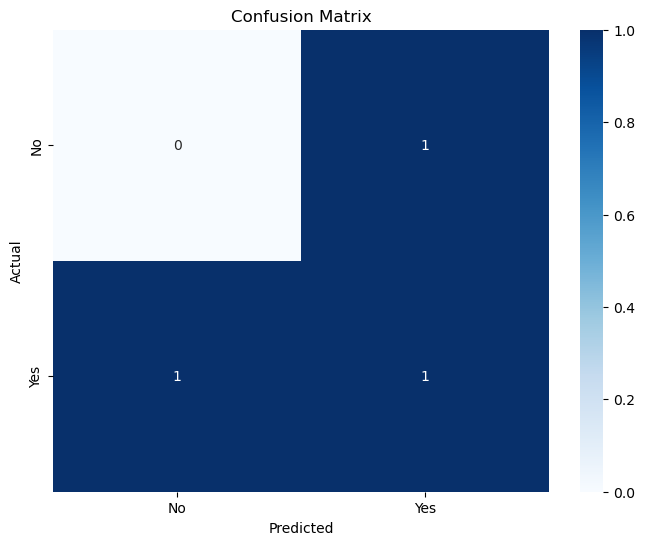


Prediction for new data point:
Test Input: {'Outlook': 'Sunny', 'Temperature': 'Mild', 'Humidity': 'Normal', 'Windy': 'Strong'}
Predicted Class: No
Predicted Probability: [[0.53835801 0.46164199]]


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Separate features and target variable
X = data.drop('Play', axis=1)
y = data['Play']
# Encode categorical features using OrdinalEncoder
encoder = OrdinalEncoder()
X = encoder.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size if needed
# Create a Categorical Naive Bayes classifier
model = CategoricalNB()
# Fit the model on the training data
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)  # Specify labels to maintain order
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)  # Use model.classes_
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
test_input = pd.DataFrame({
    'Outlook': ['Sunny'],
    'Temperature': ['Mild'],
    'Humidity': ['Normal'],
    'Windy': ['Strong']
})

# Encode the test input using the *same* encoder that was fitted on the training data!
test_input_encoded = encoder.transform(test_input)

# Make a prediction
predicted_class = model.predict(test_input_encoded)
import numpy as np

log_probs = model.predict_log_proba(test_input_encoded)
predicted_probability = np.exp(log_probs)

# Print the result
print("\nPrediction for new data point:")
print(f"Test Input: {test_input.to_dict('records')[0]}")  # Display original test input
print(f"Predicted Class: {predicted_class[0]}")
print(f"Predicted Probability: {predicted_probability}")  # Display predicted probability